In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
train=pd.read_csv('new_train.csv',sep=',')

In [5]:
test=pd.read_csv('new_test.csv',sep=',')

In [6]:
submit=pd.read_csv('new_submit.csv',sep=',')

In [7]:
train.shape,test.shape,submit.shape

((1396, 44), (150, 43), (150, 2))

In [8]:
count=0
for (ix,iy) in zip(submit['样本id'],test['样本id']):
    if ix==iy:
       count+=1

In [9]:
count

150

#### test_id is same as submit_id

In [10]:
train_m=train

In [11]:
test_m=test

In [12]:
import seaborn

In [27]:
type(train_m['A1'][0])

numpy.int64

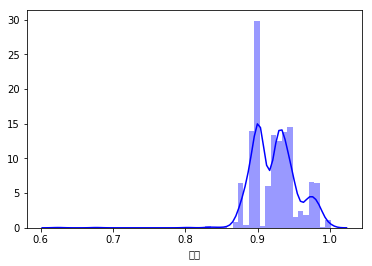

In [29]:
seaborn.distplot(train['收率'],color='b')

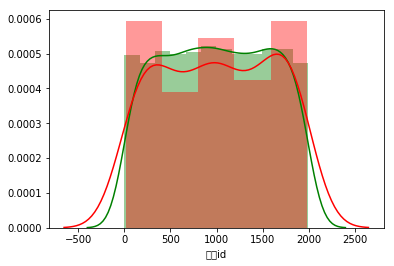

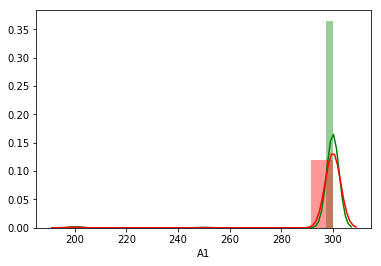

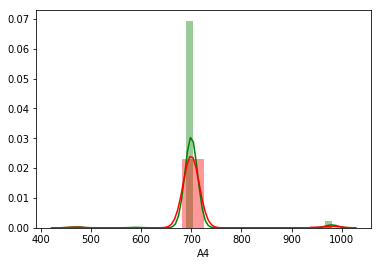

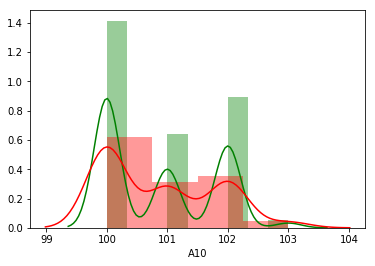

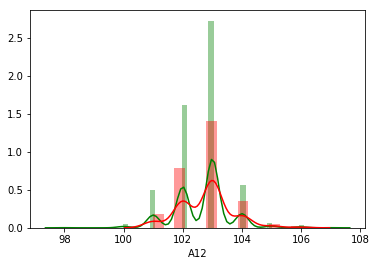

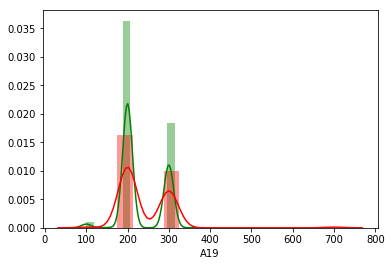

/home/zerk/miniconda3/envs/tf/lib/python3.6/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
/home/zerk/miniconda3/envs/tf/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


ValueError: cannot convert float NaN to integer

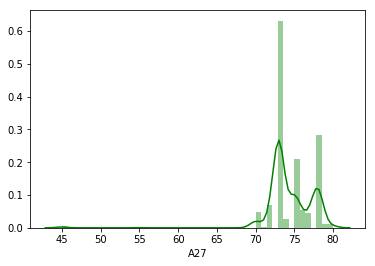

In [14]:
for col in train.columns:
    if isinstance(train_m[col][0],np.int64):
        seaborn.distplot(train_m[col],color='g')
        seaborn.distplot(test_m[col],color='r')
        plt.show()

In [15]:
train_m['A20'].count(),len(train_m['A20'])

(1396, 1396)

In [16]:
train_m.columns

Index(['样本id', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20',
       'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'B1', 'B2',
       'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13',
       'B14', '收率'],
      dtype='object')

In [31]:
# type_map={}
# for col in train_m.columns:
#     type_map[col]=type(train_m[col][0])
#     print(type(train_m[col][0]))

In [39]:
import re

In [40]:
train_m['A5'][0]

'6:30:00'

In [49]:
counta5=0
for ele in train_m['A5']:
    if len(re.findall('.+:.+:.+',ele)):
       counta5+=1 
    else:
        print(counta5,ele)

148 1900/1/29 0:00
715 1900/1/21 0:00
717 1900/1/21 0:00


In [50]:
counta9=0
for ele in train_m['A9']:
    if len(re.findall('.+:.+:.+',ele)):
       counta9+=1 
    else:
        print(counta9,ele)

339 700
652 1900/1/9 7:00


In [53]:
counta11=0
for ele in train_m['A11']:
    if len(re.findall('.+:.+:.+',ele)):
       counta11+=1 
    else:
        print(counta11,ele)

89 :30:00
747 1900/1/1 2:30


## actually index +2

In [56]:
counta14=0
for ele in train_m['A14']:
    if len(re.findall('.+:.+:.+',ele)):
       counta14+=1 
    else:
        print(counta14,ele)

In [58]:
counta14

1396

In [59]:
counta16=0
for ele in train_m['A16']:
    if len(re.findall('.+:.+:.+',ele)):
        counta16+=1 
    else:
        print(counta16,ele)

651 1900/1/12 0:00


In [61]:
counta20=0
for ele in train_m['A20']:
    if len(re.findall('.+:.+:.+',ele)):
        counta20+=1 
    else:
        print(counta20,ele)

586 16:00-16


In [65]:
counta24=0
for ele in train_m['A24']:
    ele=str(ele)
    if len(re.findall('.+:.+:.+',ele)):
        counta24+=1 
    else:
        print(counta24,ele)

1107 nan


In [66]:
counta26=0
for ele in train_m['A26']:
    ele=str(ele)
    if len(re.findall('.+:.+:.+',ele)):
        counta26+=1 
    else:
        print(counta26,ele)

362 nan
945 1900/3/13 0:00
1105 nan


In [67]:
counta28=0
for ele in train_m['A28']:
    ele=str(ele)
    if len(re.findall('.+:.+:.+',ele)):
        counta28+=1 
    else:
        print(counta28,ele)

1349 13；00-14:00


In [78]:
regex_map = {
        'A9': '.+:.+:.+',
        'A11': '.+:.+:.+',
        'A14': '.+:.+:.+',
        'A16': '.+:.+:.+',
        'A20': '.+-.+',
        'A24': '.+:.+:.+',
        'A26': '.+:.+:.+',
        'A28': '.+-.+',
        'B4': '.+-.+',
        'B5': '.+:.+:.+',
        'B7': '.+:.+:.+',
        'B9': '.+-.+',
        'B10': '.+-.+',
    }
for col in train.columns:
    count = 0
    if col in regex_map.keys():
         for ele in train[col]:
            if len(re.findall(regex_map[col], str(ele))) > 0:
                count += 1
            else:
                print(col,count, ele)
                count+=1
                

A9 339 700
A9 653 1900/1/9 7:00
A11 89 :30:00
A11 748 1900/1/1 2:30
A16 651 1900/1/12 0:00
A24 1107 nan
A26 362 nan
A26 946 1900/3/13 0:00
A26 1107 nan
B5 5 nan
B5 583 601
B10 162 nan
B10 163 nan
B10 164 nan
B10 165 nan
B10 166 nan
B10 167 nan
B10 168 nan
B10 169 nan
B10 170 nan
B10 171 nan
B10 172 nan
B10 173 nan
B10 174 nan
B10 175 nan
B10 176 nan
B10 177 nan
B10 178 nan
B10 179 nan
B10 180 nan
B10 181 nan
B10 182 nan
B10 183 nan
B10 184 nan
B10 185 nan
B10 186 nan
B10 187 nan
B10 188 nan
B10 189 nan
B10 497 nan
B10 498 nan
B10 499 nan
B10 500 nan
B10 501 nan
B10 502 nan
B10 503 nan
B10 504 nan
B10 505 nan
B10 506 nan
B10 507 nan
B10 508 nan
B10 509 nan
B10 510 nan
B10 511 nan
B10 512 nan
B10 513 nan
B10 514 nan
B10 515 nan
B10 516 nan
B10 517 nan
B10 518 nan
B10 519 nan
B10 520 nan
B10 521 nan
B10 522 nan
B10 523 nan
B10 524 nan
B10 525 nan
B10 526 nan
B10 527 nan
B10 528 nan
B10 529 nan
B10 530 nan
B10 531 nan
B10 532 nan
B10 533 nan
B10 534 nan
B10 535 nan
B10 536 nan
B10 537 nan


In [79]:
regex_map = {
        'A9': '.+:.+:.+',
        'A11': '.+:.+:.+',
        'A14': '.+:.+:.+',
        'A16': '.+:.+:.+',
        'A20': '.+-.+',
        'A24': '.+:.+:.+',
        'A26': '.+:.+:.+',
        'A28': '.+-.+',
        'B4': '.+-.+',
        'B5': '.+:.+:.+',
        'B7': '.+:.+:.+',
        'B9': '.+-.+',
        'B10': '.+-.+',
    }
for col in test.columns:
    count = 0
    if col in regex_map.keys():
         for ele in test[col]:
            if len(re.findall(regex_map[col], str(ele))) > 0:
                count += 1
            else:
                print(col,count, ele)
                count+=1

A20 56 nan
B10 20 nan
B10 21 nan
B10 22 nan
B10 54 nan
B10 55 nan
B10 56 nan
B10 57 nan
B10 58 nan
B10 59 nan
B10 60 nan
B10 77 nan
B10 94 nan
B10 95 nan
B10 96 nan
B10 97 nan
B10 98 nan
B10 99 nan
B10 143 nan
B10 144 nan
B10 145 nan
B10 146 nan
B10 147 nan


In [37]:
re.findall('.+:.+:.+','30:30')

[]

In [ ]:
train_m

In [19]:
len(train_m['A1'])

1396

In [20]:
train_m['A2'].count()

42

In [68]:
for col in train_m.columns:
    print('{} missed num is {}'.format(col,len(train_m[col])-train_m[col].count()))

样本id missed num is 0
A1 missed num is 0
A2 missed num is 1354
A3 missed num is 42
A4 missed num is 0
A5 missed num is 0
A6 missed num is 0
A7 missed num is 1247
A8 missed num is 1247
A9 missed num is 0
A10 missed num is 0
A11 missed num is 0
A12 missed num is 0
A13 missed num is 0
A14 missed num is 0
A15 missed num is 0
A16 missed num is 0
A17 missed num is 0
A18 missed num is 0
A19 missed num is 0
A20 missed num is 0
A21 missed num is 3
A22 missed num is 0
A23 missed num is 3
A24 missed num is 1
A25 missed num is 0
A26 missed num is 2
A27 missed num is 0
A28 missed num is 0
B1 missed num is 10
B2 missed num is 2
B3 missed num is 2
B4 missed num is 0
B5 missed num is 1
B6 missed num is 0
B7 missed num is 0
B8 missed num is 1
B9 missed num is 0
B10 missed num is 244
B11 missed num is 849
B12 missed num is 1
B13 missed num is 1
B14 missed num is 0
收率 missed num is 0


In [24]:
train_m['收率'].

<bound method Series.std of 0       0.9000
1       0.8960
2       0.9300
3       0.9350
4       0.9230
5       0.9230
6       0.9230
7       0.9230
8       0.9230
9       0.8790
10      0.8910
11      0.8790
12      0.8790
13      0.8910
14      0.9230
15      0.9230
16      0.8910
17      0.9230
18      0.9230
19      0.9670
20      0.9350
21      0.8910
22      0.9797
23      0.9670
24      0.9020
25      0.9020
26      0.9020
27      0.9020
28      0.9350
29      0.9020
         ...  
1366    0.9300
1367    0.9300
1368    0.9180
1369    0.9300
1370    0.9300
1371    0.9300
1372    0.9300
1373    0.9300
1374    0.9300
1375    0.9300
1376    0.9180
1377    0.9360
1378    0.8880
1379    0.9300
1380    0.8880
1381    0.9300
1382    0.8880
1383    0.9430
1384    0.9300
1385    0.8820
1386    0.9300
1387    0.9430
1388    0.8880
1389    0.9300
1390    0.9300
1391    0.9300
1392    0.8880
1393    0.9180
1394    0.9430
1395    0.9000
Name: 收率, Length: 1396, dtype: float64>

In [32]:
test

,样本id,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,B5,B6,B7,B8,B9,B10,B11,B12,B13,B14
0,15,300,NaN,405.0,700,21:00:00,24,NaN,NaN,22:30:00,...,17:00:00,60,20:30:00,45,20:30-22:00,23:00-0:00,NaN,800,0.15,420
1,23,300,NaN,405.0,700,5:00:00,24,NaN,NaN,6:30:00,...,20:30:00,60,2:00:00,40,3:00-4:30,5:00-6:30,NaN,800,0.15,400
2,35,300,NaN,405.0,700,22:00:00,21,NaN,NaN,23:00:00,...,17:00:00,65,22:00:00,40,22:30-0:00,0:30-2:00,NaN,800,0.15,440
3,48,300,NaN,405.0,700,7:00:00,24,NaN,NaN,8:00:00,...,20:00:00,60,23:00:00,40,0:30-2:30,3:00-4:30,NaN,800,0.15,420
4,49,300,NaN,405.0,700,22:00:00,20,NaN,NaN,23:00:00,...,6:00:00,67,7:30:00,45,7:30-9:00,9:30-11:00,NaN,800,0.15,400
5,53,300,NaN,405.0,700,18:00:00,18,NaN,NaN,19:00:00,...,2:00:00,68,3:30:00,45,3:30-5:00,5:30-7:00,NaN,400,0.15,400
6,54,300,NaN,405.0,700,23:00:00,18,NaN,NaN,0:00:00,...,7:00:00,68,8:30:00,45,8:30-10:00,10:30-12:00,NaN,800,0.15,400
7,77,300,NaN,405.0,700,14:00:00,30,NaN,NaN,16:00:00,...,23:00:00,80,1:00:00,45,1:00-2:30,2:30-4:00,4:00-5:00,1200,0.15,400
8,90,300,NaN,405.0,700,22:00:00,30,NaN,NaN,0:00:00,...,7:00:00,78,9:00:00,45,9:00-10:30,10:30-12:00,12:00-13:00,1200,0.15,420
9,114,300,NaN,405.0,700,14:00:00,29,NaN,NaN,16:00:00,...,23:00:00,79,1:00:00,45,1:00-2:30,2:30-4:00,4:00-5:00,1200,0.15,420


In [75]:
import re

In [76]:
def get_num(str):
    return int(re.findall('[0-9]+',str)[0])

In [77]:
strs=test['样本id'].apply(get_num)

In [78]:
test_back=test

In [79]:
test_back['样本id']=test_back['样本id'].apply(get_num)

In [80]:
test_back.sort_values('样本id')

,样本id,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,B5,B6,B7,B8,B9,B10,B11,B12,B13,B14
98,15,300,NaN,405.0,700,21:00:00,24,NaN,NaN,22:30:00,...,17:00:00,60,20:30:00,45,20:30-22:00,23:00-0:00,NaN,800,0.15,420
33,23,300,NaN,405.0,700,5:00:00,24,NaN,NaN,6:30:00,...,20:30:00,60,2:00:00,40,3:00-4:30,5:00-6:30,NaN,800,0.15,400
129,35,300,NaN,405.0,700,22:00:00,21,NaN,NaN,23:00:00,...,17:00:00,65,22:00:00,40,22:30-0:00,0:30-2:00,NaN,800,0.15,440
70,48,300,NaN,405.0,700,7:00:00,24,NaN,NaN,8:00:00,...,20:00:00,60,23:00:00,40,0:30-2:30,3:00-4:30,NaN,800,0.15,420
120,49,300,NaN,405.0,700,22:00:00,20,NaN,NaN,23:00:00,...,6:00:00,67,7:30:00,45,7:30-9:00,9:30-11:00,NaN,800,0.15,400
118,53,300,NaN,405.0,700,18:00:00,18,NaN,NaN,19:00:00,...,2:00:00,68,3:30:00,45,3:30-5:00,5:30-7:00,NaN,400,0.15,400
116,54,300,NaN,405.0,700,23:00:00,18,NaN,NaN,0:00:00,...,7:00:00,68,8:30:00,45,8:30-10:00,10:30-12:00,NaN,800,0.15,400
27,77,300,NaN,405.0,700,14:00:00,30,NaN,NaN,16:00:00,...,23:00:00,80,1:00:00,45,1:00-2:30,2:30-4:00,4:00-5:00,1200,0.15,400
30,90,300,NaN,405.0,700,22:00:00,30,NaN,NaN,0:00:00,...,7:00:00,78,9:00:00,45,9:00-10:30,10:30-12:00,12:00-13:00,1200,0.15,420
11,114,300,NaN,405.0,700,14:00:00,29,NaN,NaN,16:00:00,...,23:00:00,79,1:00:00,45,1:00-2:30,2:30-4:00,4:00-5:00,1200,0.15,420


In [13]:
numlist=strs.tolist()

In [14]:
nums=[get_num(x) for x in numlist]

In [15]:
nums[0]

'1656'

In [16]:
nums

['1656',
 '1548',
 '769',
 '1881',
 '1807',
 '145',
 '1212',
 '944',
 '829',
 '616',
 '1690',
 '114',
 '185',
 '1141',
 '1460',
 '1835',
 '1539',
 '598',
 '1800',
 '394',
 '1146',
 '149',
 '1750',
 '1977',
 '1830',
 '818',
 '881',
 '77',
 '1240',
 '309',
 '90',
 '1447',
 '1584',
 '23',
 '1188',
 '1461',
 '1691',
 '316',
 '299',
 '459',
 '462',
 '1730',
 '689',
 '1943',
 '1043',
 '919',
 '1104',
 '348',
 '123',
 '1645',
 '1522',
 '1874',
 '295',
 '954',
 '1529',
 '722',
 '1703',
 '1524',
 '125',
 '1922',
 '1186',
 '938',
 '1744',
 '936',
 '1973',
 '157',
 '1003',
 '1407',
 '1057',
 '1783',
 '48',
 '263',
 '678',
 '882',
 '1688',
 '1361',
 '1802',
 '250',
 '323',
 '1514',
 '1545',
 '830',
 '1757',
 '917',
 '1728',
 '352',
 '1229',
 '619',
 '1138',
 '687',
 '966',
 '537',
 '867',
 '928',
 '520',
 '1338',
 '988',
 '899',
 '15',
 '1412',
 '1915',
 '1885',
 '1893',
 '688',
 '1664',
 '1667',
 '1516',
 '437',
 '203',
 '1389',
 '761',
 '1373',
 '558',
 '1710',
 '153',
 '934',
 '54',
 '1227',
 '

In [19]:
test_date=nums

In [36]:
test

,样本id,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,B5,B6,B7,B8,B9,B10,B11,B12,B13,B14
0,sample_1656,300,NaN,405.0,700,6:00:00,29,NaN,NaN,8:00:00,...,15:00:00,79,17:00:00,45,17:00-18:30,18:30-20:00,20:00-21:00,1200,0.15,400
1,sample_1548,300,NaN,405.0,700,12:30:00,39,12:50:00,80.0,14:20:00,...,7:50:00,65,10:00:00,45,12:00-13:00,14:00-15:30,NaN,800,0.15,385
2,sample_769,300,NaN,405.0,700,6:00:00,80,NaN,NaN,8:00:00,...,15:00:00,80,17:00:00,45,17:00-20:00,NaN,NaN,1200,0.15,440
3,sample_1881,300,NaN,405.0,700,22:00:00,29,NaN,NaN,0:00:00,...,7:00:00,80,9:00:00,45,9:00-10:30,10:30-12:00,12:00-13:00,1200,0.15,400
4,sample_1807,300,NaN,405.0,700,22:00:00,30,NaN,NaN,0:00:00,...,7:00:00,79,9:00:00,45,9:00-10:30,10:30-12:00,12:00-13:00,1200,0.15,400
5,sample_145,300,NaN,405.0,700,14:00:00,29,NaN,NaN,16:00:00,...,23:00:00,80,1:00:00,45,1:00-2:30,2:30-4:00,4:00-5:00,1200,0.15,400
6,sample_1212,300,NaN,405.0,700,6:00:00,29,NaN,NaN,8:00:00,...,15:00:00,75,17:00:00,45,17:00-18:30,18:30-20:00,20:00-21:00,1200,0.15,400
7,sample_944,300,NaN,405.0,700,10:00:00,24,NaN,NaN,11:00:00,...,18:00:00,64,20:00:00,45,20:10-21:10,21:30-22:40,NaN,900,0.15,400
8,sample_829,300,NaN,405.0,700,21:00:00,30,NaN,NaN,23:00:00,...,6:00:00,80,8:00:00,45,8:00-12:00,NaN,NaN,1200,0.15,440
9,sample_616,300,NaN,405.0,700,14:00:00,28,NaN,NaN,16:00:00,...,23:00:00,80,1:00:00,45,1:00-2:30,2:30-4:00,4:00-5:00,1200,0.15,400


In [33]:
submitback.drop([0.01],axis=1)

,sample_1656
0,sample_1548
1,sample_769
2,sample_1881
3,sample_1807
4,sample_145
5,sample_1212
6,sample_944
7,sample_829
8,sample_616
9,sample_1690


In [30]:
submitback

,sample_1656,0.01
0,sample_1548,0.01
1,sample_769,0.01
2,sample_1881,0.01
3,sample_1807,0.01
4,sample_145,0.01
5,sample_1212,0.01
6,sample_944,0.01
7,sample_829,0.01
8,sample_616,0.01
9,sample_1690,0.01


In [18]:
submit.drop(['o'])

,sample_1656,0.01
0,sample_1548,0.01
1,sample_769,0.01
2,sample_1881,0.01
3,sample_1807,0.01
4,sample_145,0.01
5,sample_1212,0.01
6,sample_944,0.01
7,sample_829,0.01
8,sample_616,0.01
9,sample_1690,0.01


In [89]:
submit

,sample_1656,0.01,a
0,sample_1548,0.01,qwe
1,sample_769,0.01,qwe
2,sample_1881,0.01,qwe
3,sample_1807,0.01,qwe
4,sample_145,0.01,qwe
5,sample_1212,0.01,qwe
6,sample_944,0.01,qwe
7,sample_829,0.01,qwe
8,sample_616,0.01,qwe
9,sample_1690,0.01,qwe


In [13]:
for x in data['A2']:
    if x!=np.nan:
        print(x)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
125.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
125.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
125.0
nan
nan
nan
nan
nan
